<a href="https://colab.research.google.com/github/7ZXU/nlp-with-pytorch/blob/main/chapter2/chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1 말뭉치, 토큰, 타입

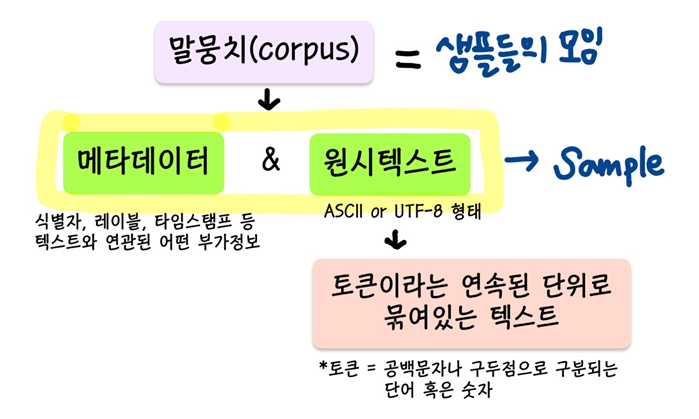

- 데이터포인트

    메타데이터 + 텍스트 = 샘플 (데이터포인트)

- 데이터셋

    샘플 여러개 모음 = 말뭉치 (데이터셋)

- 토큰화 

    - 텍스트를 토큰으로 나눔 
    - 텍스트를 바이트 스트림으로 표현하여 토큰화 문제를 피할 수 있음

In [ ]:
import spacy
nlp = spacy.load('en')
text = "Mary, don't slap the green witch"

print(nlp)
# spacy.load # 

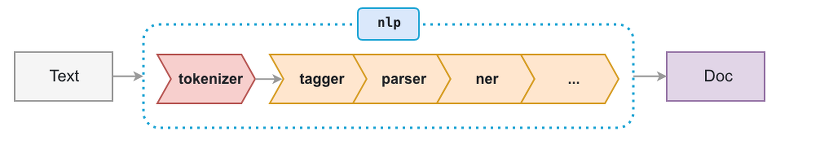

spacy.load 는 NLP 기능을 처리할 수 있는 모델을 불러온다

In [ ]:
print([str(token) for token in nlp(text.lower())])

# text를 소문자로 변환하여 
# nlp 객체를 통해 토큰화한다 
# 반환된 토큰을 string으로 변환하여 출력한다

['mary', ',', 'do', "n't", 'slap', 'the', 'green', 'witch']


TweetTokenizer

이모티콘, 해시태그 등을 인식을 지원하는 라이브러리

In [ ]:
from nltk.tokenize import TweetTokenizer

tweet = u"Snow White and the Seven Degrees #MakeMovieCold@midnight:-)"
tokenizer = TweetTokenizer()
print(tokenizer.tokenize(tweet.lower()))


['snow', 'white', 'and', 'the', 'seven', 'degrees', '#makemoviecold', '@midnight', ':-)']


workd_tokenize

단어 단위로 나누는 기능을 지원하는 라이브러리

In [ ]:
# [Error] Resource punkt not found.
# 에러 해결
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk import word_tokenize

# from nltk.tokenize import word_tokenize

tweet = "Snow White and the Seven Degrees #MakeMovieCold@midnight:-)"
print(word_tokenize(tweet.lower()))

['snow', 'white', 'and', 'the', 'seven', 'degrees', '#', 'makemoviecold', '@', 'midnight', ':', '-', ')']


- 타입

    말뭉치에 등장하는 고유한 토큰

- 어휘 

    말뭉치에 있는 모든 타입(토큰)의 집합

- 단어 

    - 내용어 

    - 불용어 : 내용어를 보충하는 용도 (예) 관사, 전치사

# 2.2 유니그램, 바이그램, 트라이그램, ... , n-그램

- n-gram

    - [참고] https://funny-golf-f5e.notion.site/n-gram-29d149ef8d5647cc88fe615f00e9ee56

    - 고정길이(n)의 연속된 토큰 시퀀스

    - n개의 토큰을 묶어 하나의 토큰으로 취급한다
- bi-gram : 토큰 두 개

- unigram : 토큰 한 개

In [22]:
def n_grams(text, n):
    return [ text[i: i+n] for i in range(len(text)-n+1) ] # range(n) : n-1 이하의 수 발생

cleaned = ['mary', ',', 'do', "n't", 'slap', 'the', 'green', 'witch']
print(n_grams(cleaned, 3))


[['mary', ',', 'do'], [',', 'do', "n't"], ['do', "n't", 'slap'], ["n't", 'slap', 'the'], ['slap', 'the', 'green'], ['the', 'green', 'witch']]


# 2.3 표제어와 어간

표제어

- 단어의 기본형

- 코튼으로 표제어로 바꿔 벡터 표현의 차원을 줄일 수 있다

In [23]:
# .lemma_
# 토큰을 표제어로 변환

import spacy
nlp = spacy.load('en')
doc = nlp(u"he was running late")
for token in doc:
    print('{} --> {}'.format(token, token.lemma_))

he --> -PRON-
was --> be
running --> run
late --> late


# 2.4 단어 분류하기: 품사 태깅

토큰에 품사를 레이블링 하여 분류할 수 있다.

In [24]:
import spacy
nlp = spacy.load('en')
doc = nlp(u"Mary slapped the green witch.")
for token in doc:
    print('{} -> {}'.format(token, token.pos_))

Mary -> PROPN
slapped -> VERB
the -> DET
green -> ADJ
witch -> NOUN
. -> PUNCT


# 2.6 청크 나누기와 개체명 인식

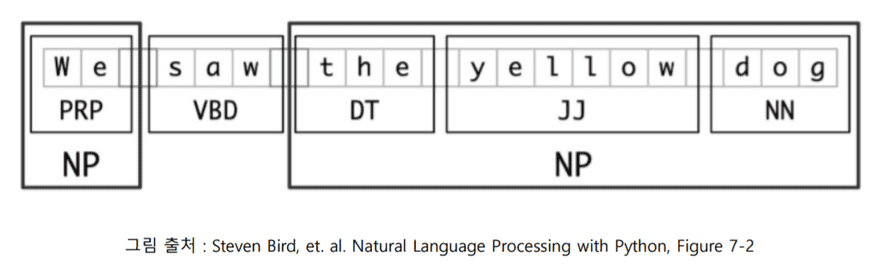

- chunk
    문장을 품사 단위로 나누고 

    나눈 품사를 조합해서 구로 만드는 과정을 chunking 이라고 한다.

    그렇게 해서 만들어진 구를 chunk 라고 한다.

- 개체명

    실제 세상에 존재하는 개념

    (예) 사람, 장소, 회사 ...

In [30]:
nlp = spacy.load('en')
doc = nlp(u"Mary slapped the green witch.")
for chunk in doc.noun_chunks:
    print('{} -> {}'.format(chunk, chunk.label_))

Mary -> NP
the green witch -> NP


# 2.7 문장 구조

- 구성 구문 분석

    = 문장 분석 트리
- 의존 구문 분석